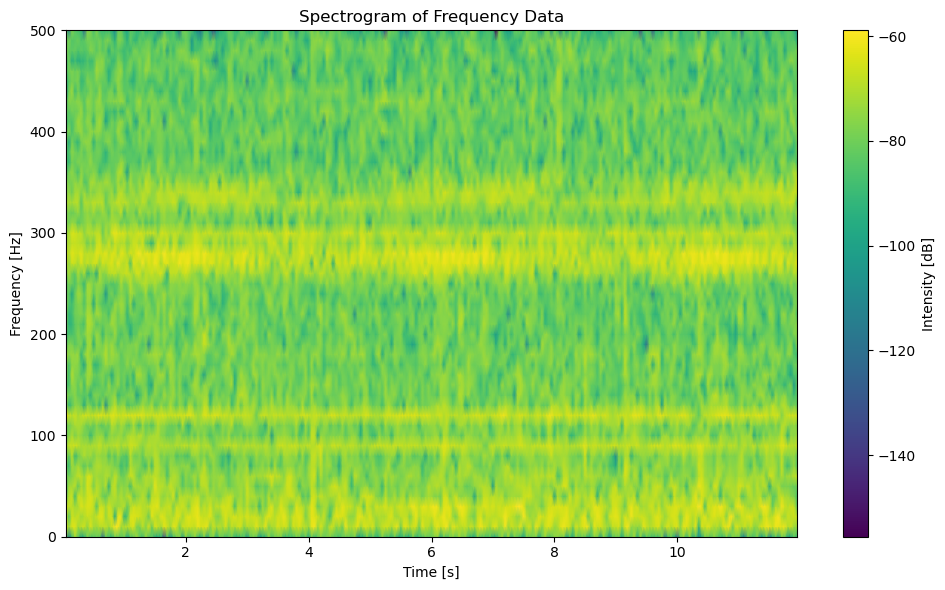

In [26]:
import numpy as np
import pandas as pd
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

# CSV 파일 경로설
csv_file_path = "data/STFMK-20201105-LW15-2055_20201125_163921_004.csv"
# CSV 파일 불러오기
data = pd.read_csv(csv_file_path)

# 주파수 데이터 추출
frequencies = data['y'].values

# 샘플링 주파수 설정
sampling_freq = 1000  # 샘플링 주파수 (예: 1000 Hz)}

# STFT 계산
window_size = 100  # 변경하고자 하는 윈도우 크기
f, t, Sxx = spectrogram(frequencies, fs=sampling_freq, nperseg=window_size, noverlap=window_size // 2)

# # STFT 계산
# f, t, Sxx = spectrogram(frequencies, fs=sampling_freq, nperseg=256, noverlap=128)

# 스펙트로그램 시각화
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.title('Spectrogram of Frequency Data')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Intensity [dB]')
plt.ylim(0, 500)  # 주파수 범위 설정 (예: 0 ~ 500 Hz)
plt.tight_layout()
plt.show()

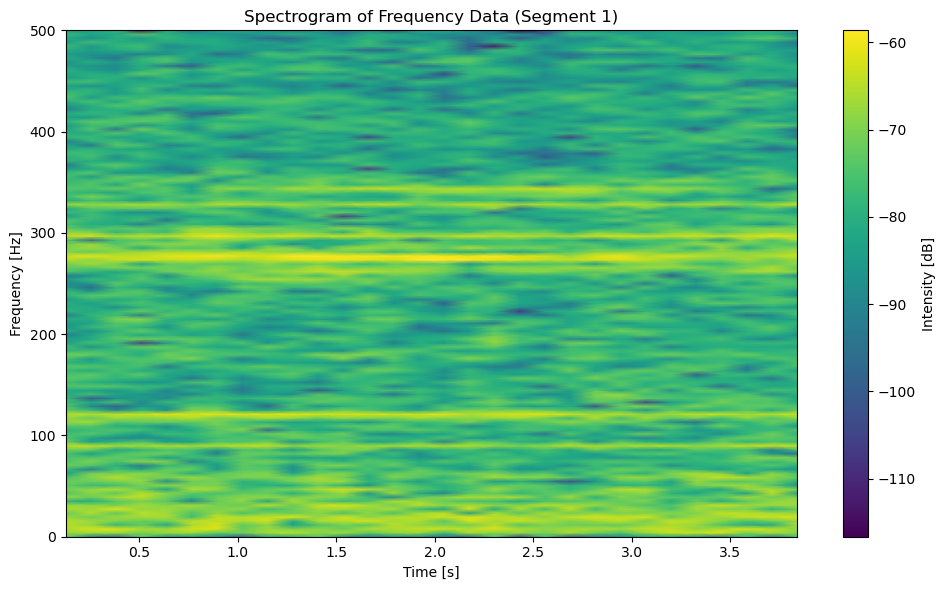

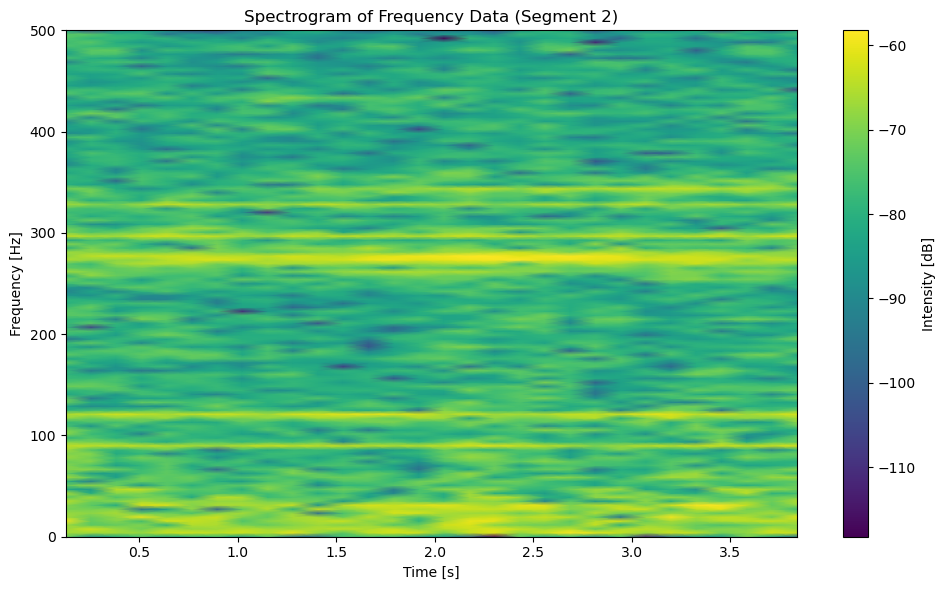

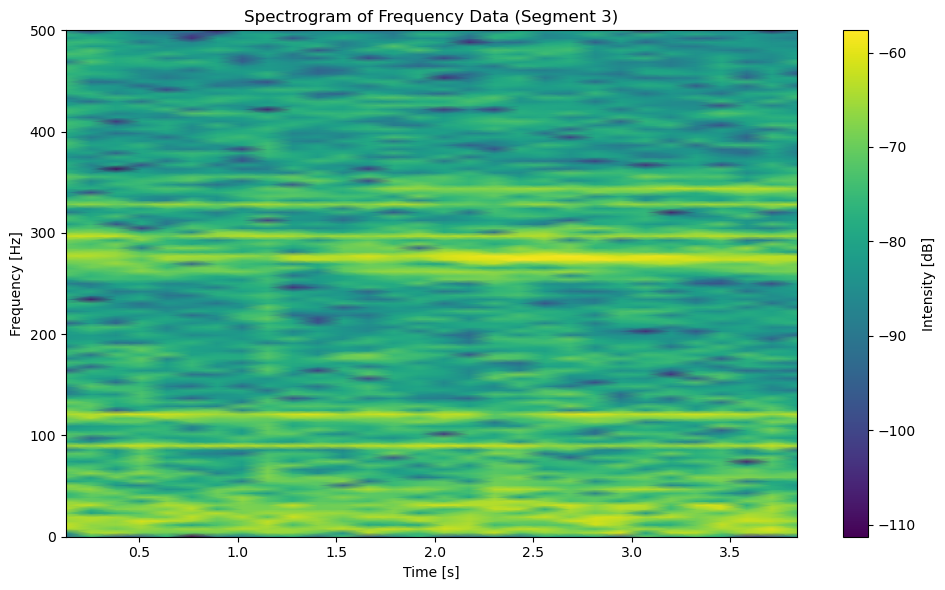

In [27]:
import numpy as np
import pandas as pd
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

# CSV 파일 경로
csv_file_path = "data/STFMK-20201105-LW15-2055_20201125_163921_004.csv"
# CSV 파일 불러오기
data = pd.read_csv(csv_file_path)

# 주파수 데이터 추출
frequencies = data['y'].values

# 샘플링 주파수 설정
sampling_freq = 1000  # 샘플링 주파수 (예: 1000 Hz)

# 데이터를 세 개의 등분으로 나누기
num_segments = 3
segment_length = len(frequencies) // num_segments

# 각 세그먼트에 대한 스펙트로그램 계산 및 시각화
for i in range(num_segments):
    start_idx = i * segment_length
    end_idx = (i + 1) * segment_length
    
    segment_freq = frequencies[start_idx:end_idx]
    f, t, Sxx = spectrogram(segment_freq, fs=sampling_freq, nperseg=256, noverlap=128)
    
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
    plt.title(f'Spectrogram of Frequency Data (Segment {i+1})')
    plt.xlabel('Time [s]')
    plt.ylabel('Frequency [Hz]')
    plt.colorbar(label='Intensity [dB]')
    plt.ylim(0, 500)  # 주파수 범위 설정 (예: 0 ~ 500 Hz)
    plt.tight_layout()
    plt.show()

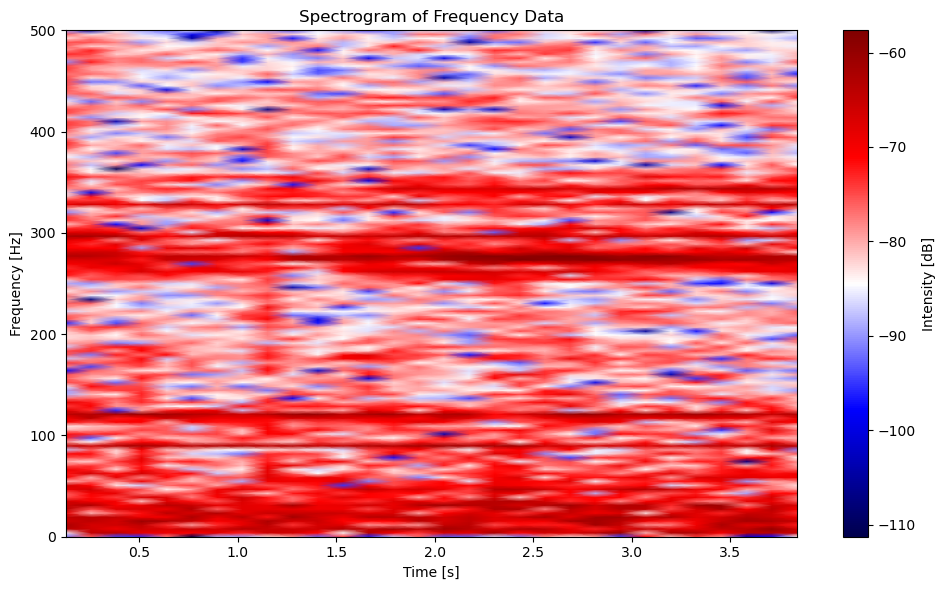

In [33]:
# Specify the colormap
custom_cmap = 'seismic'  # You can choose any other colormap from Matplotlib's available colormaps

# Visualize the spectrogram with the custom colormap
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap=custom_cmap)
plt.title('Spectrogram of Frequency Data')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Intensity [dB]')
plt.ylim(0, 500)  # 주파수 범위 설정 (예: 0 ~ 500 Hz)
plt.tight_layout()
plt.show()

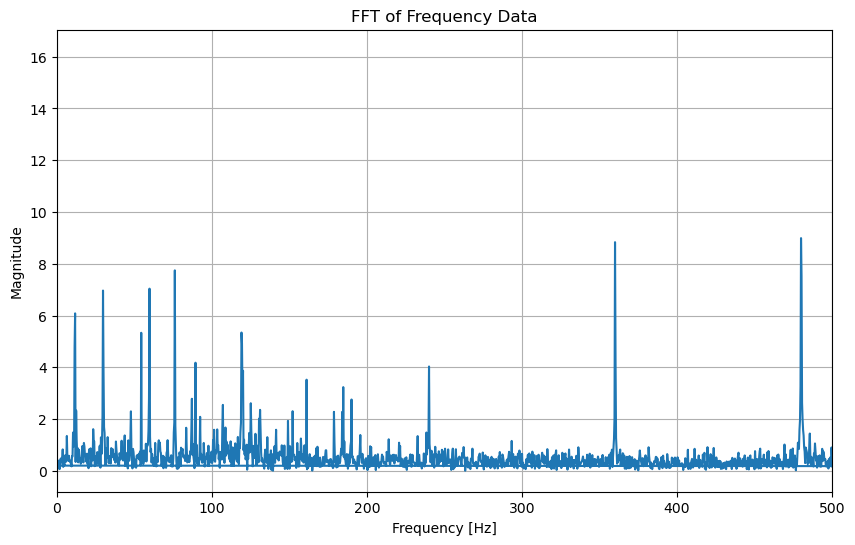

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
csv_file_path = "data/STFMK-20201105-LW15-2055_20201125_163921_004.csv"
# CSV 파일 불러오기
data = pd.read_csv(csv_file_path)

# 시간 데이터 추출
time = data['x'].values
# 주파수 데이터 추출
frequencies = data['y'].values

# FFT 계산
fft_result = np.fft.fft(frequencies)
# 주파수 범위 계산
freq_range = np.fft.fftfreq(len(time), d=(time[1]-time[0]))

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(freq_range, np.abs(fft_result))
plt.title('FFT of Frequency Data')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 500)  # 주파수 범위 설정 (예: 0 ~ 500 Hz)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_16720\3720826999.py:24: UserWarning: Input data is complex, switching to return_onesided=False
  f, t, Sxx = spectrogram(fft_result, fs=1.0 / (time[1]-time[0]), nperseg=window_size, noverlap=overlap)


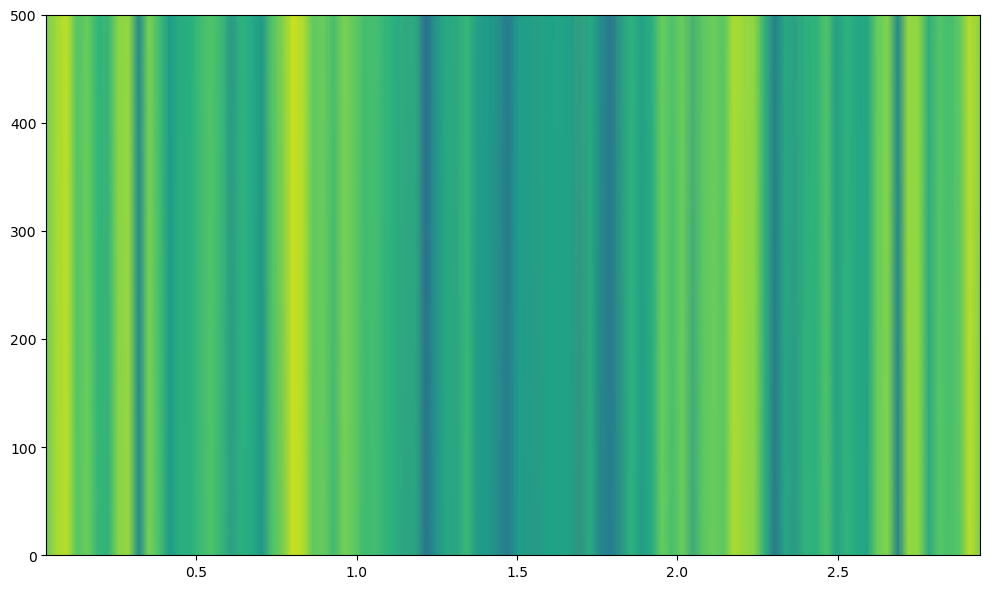

In [55]:
import numpy as np
import pandas as pd
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

# CSV 파일 경로
csv_file_path = "data/STFMK-20201105-LW15-2055_20201125_163921_004.csv"
# CSV 파일 불러오기
data = pd.read_csv(csv_file_path)

# 시간 데이터 추출
time = data['x'].values
# 주파수 데이터 추출
frequencies = data['y'].values

# FFT 계산
fft_result = np.fft.fft(frequencies)
# 주파수 범위 계산
freq_range = np.fft.fftfreq(len(time), d=(time[1]-time[0]))

# STFT 계산
window_size = 256
overlap = window_size // 2
f, t, Sxx = spectrogram(fft_result, fs=1.0 / (time[1]-time[0]), nperseg=window_size, noverlap=overlap)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
# plt.title('Spectrogram of FFT Data')
# plt.xlabel('Time [s]')
# plt.ylabel('Frequency [Hz]')
# plt.colorbar(label='Intensity [dB]')
plt.ylim(0, 500)  # 주파수 범위 설정 (예: 0 ~ 500 Hz)
plt.tight_layout()

# 이미지 저장
plt.savefig('spectrogram.png')

plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_16720\3646464266.py:35: UserWarning: Input data is complex, switching to return_onesided=False
  f, t, Sxx = spectrogram(segment_fft, fs=1.0 / (time[1]-time[0]), nperseg=window_size, noverlap=overlap)


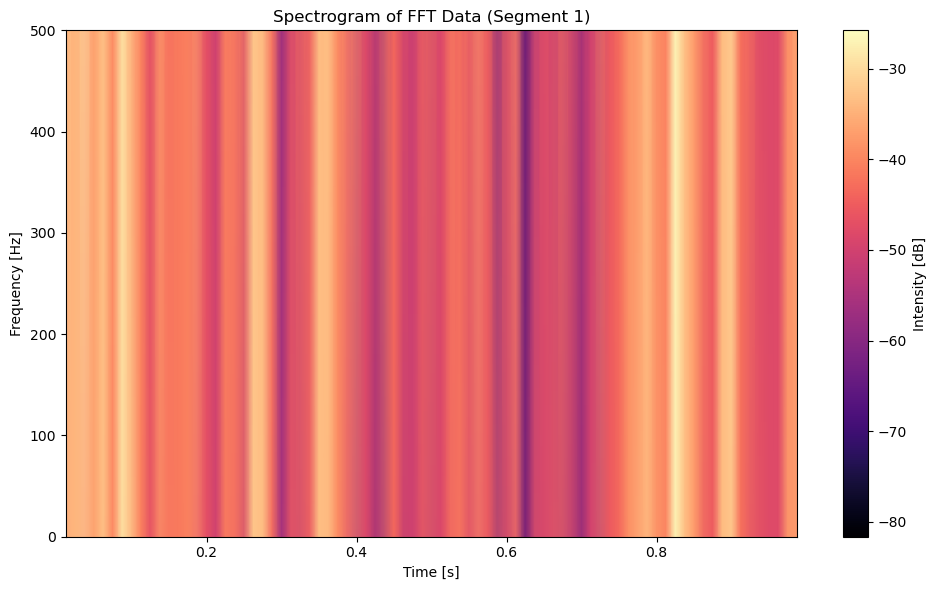

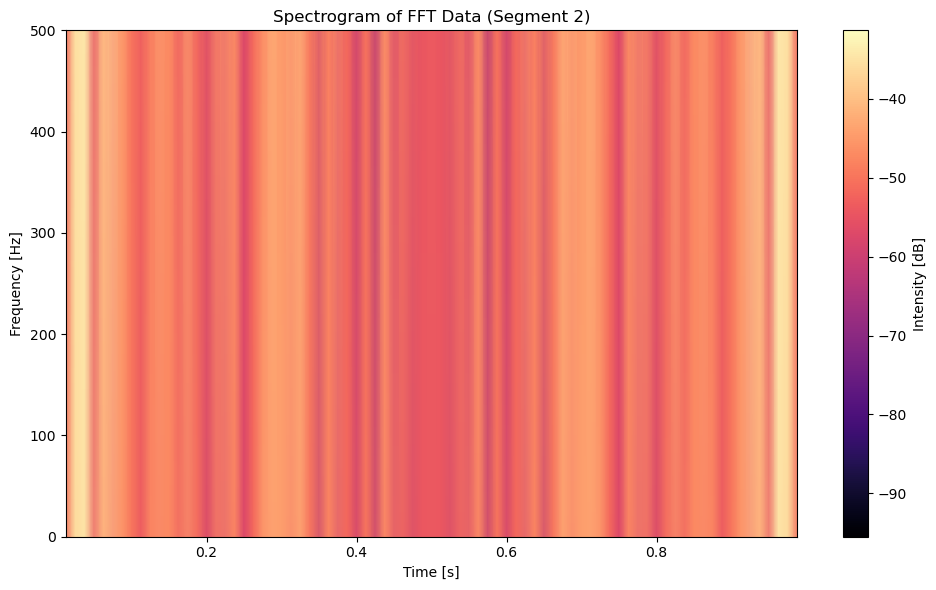

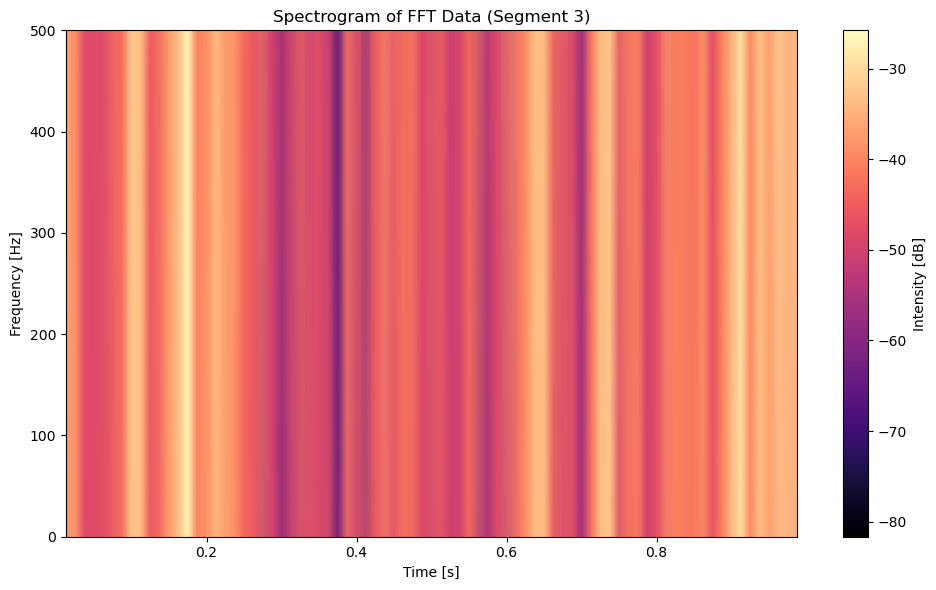

In [51]:
import numpy as np
import pandas as pd
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

# CSV 파일 경로
csv_file_path = "data/STFMK-20201105-LW15-2055_20201125_163921_004.csv"
# CSV 파일 불러오기
data = pd.read_csv(csv_file_path)

# 시간 데이터 추출
time = data['x'].values
# 주파수 데이터 추출
frequencies = data['y'].values

# FFT 계산
fft_result = np.fft.fft(frequencies)
# 주파수 범위 계산
freq_range = np.fft.fftfreq(len(time), d=(time[1]-time[0]))

# FFT 결과를 세 개의 등분으로 나누기
num_segments = 3
segment_length = len(fft_result) // num_segments

# 각 세그먼트에 대한 STFT 계산 및 시각화
for i in range(num_segments):
    start_idx = i * segment_length
    end_idx = (i + 1) * segment_length
    
    segment_fft = fft_result[start_idx:end_idx]
    
    # STFT 계산
    window_size = 100
    overlap = window_size // 2
    f, t, Sxx = spectrogram(segment_fft, fs=1.0 / (time[1]-time[0]), nperseg=window_size, noverlap=overlap)
    
    custom_cmap = 'magma'
    
    # 결과 시각화
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap=custom_cmap)
    plt.title(f'Spectrogram of FFT Data (Segment {i+1})')
    plt.xlabel('Time [s]')
    plt.ylabel('Frequency [Hz]')
    plt.colorbar(label='Intensity [dB]')
    plt.ylim(0, 500)  # 주파수 범위 설정 (예: 0 ~ 500 Hz)
    plt.tight_layout()

    # plt.savefig(f'spectrogram_segment_{i+1}.png')
    
    plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_16720\484549938.py:24: UserWarning: Input data is complex, switching to return_onesided=False
  f, t, Sxx = spectrogram(fft_result, fs=1.0 / (time[1]-time[0]), nperseg=window_size, noverlap=overlap)


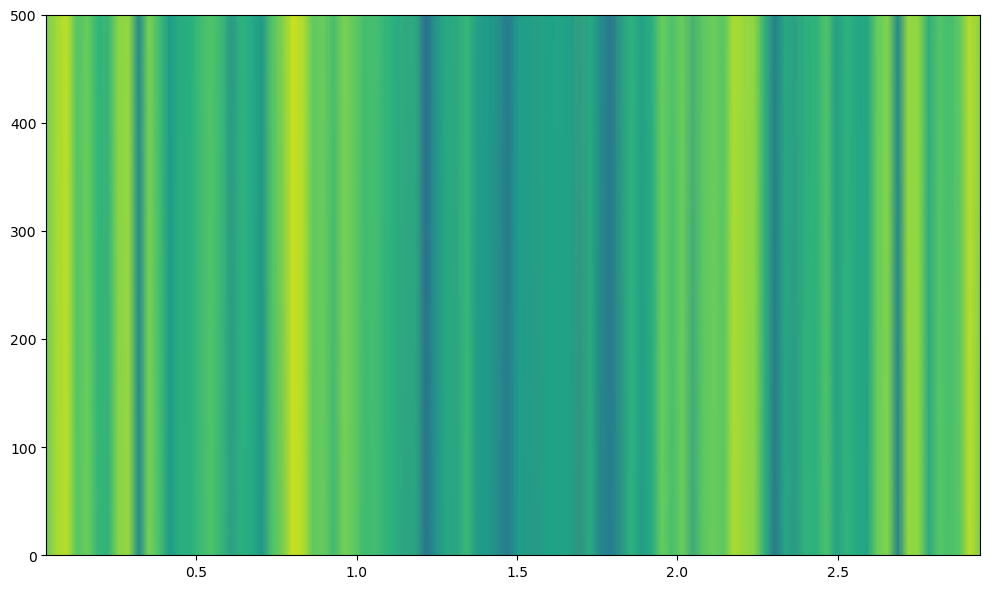

In [56]:
import numpy as np
import pandas as pd
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

# CSV 파일 경로
csv_file_path = "data/STFMK-20201105-LW15-2055_20201125_163921_004.csv"
# CSV 파일 불러오기
data = pd.read_csv(csv_file_path)

# 시간 데이터 추출
time = data['x'].values
# 주파수 데이터 추출
frequencies = data['y'].values

# FFT 계산
fft_result = np.fft.fft(frequencies)
# 주파수 범위 계산
freq_range = np.fft.fftfreq(len(time), d=(time[1]-time[0]))

# STFT 계산
window_size = 256
overlap = window_size // 2
f, t, Sxx = spectrogram(fft_result, fs=1.0 / (time[1]-time[0]), nperseg=window_size, noverlap=overlap)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.ylim(0, 500)  # 주파수 범위 설정 (예: 0 ~ 500 Hz)

# Remove padding and margins
plt.gca().set_aspect('auto')

plt.tight_layout()

# 이미지 저장
plt.savefig('spectrogramTest.png', bbox_inches='tight', pad_inches=0)

plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_16720\2072805560.py:24: UserWarning: Input data is complex, switching to return_onesided=False
  f, t, Sxx = spectrogram(fft_result, fs=1.0 / (time[1]-time[0]), nperseg=window_size, noverlap=overlap)


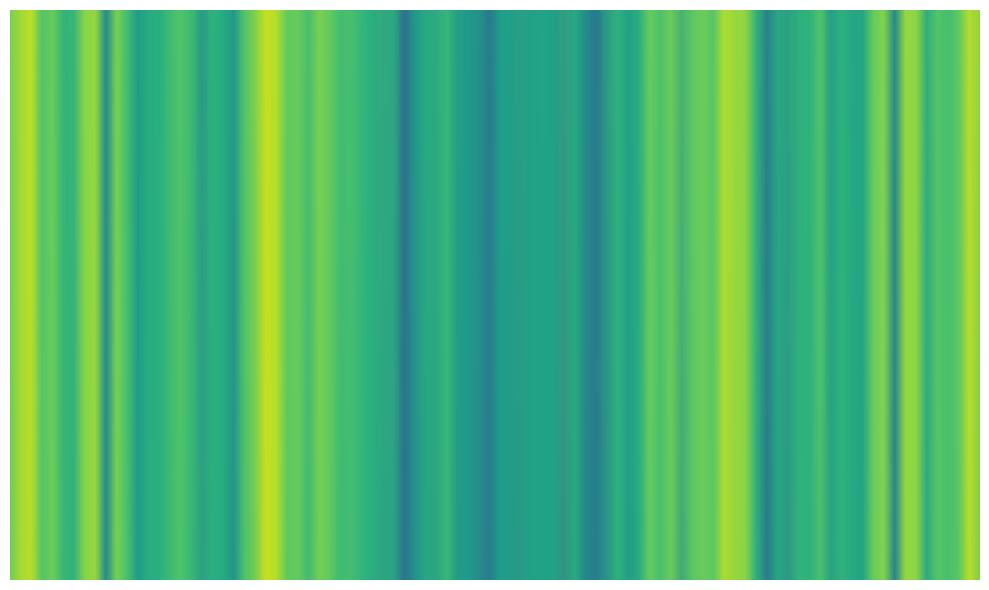

In [57]:
import numpy as np
import pandas as pd
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

# CSV 파일 경로
csv_file_path = "data/STFMK-20201105-LW15-2055_20201125_163921_004.csv"
# CSV 파일 불러오기
data = pd.read_csv(csv_file_path)

# 시간 데이터 추출
time = data['x'].values
# 주파수 데이터 추출
frequencies = data['y'].values

# FFT 계산
fft_result = np.fft.fft(frequencies)
# 주파수 범위 계산
freq_range = np.fft.fftfreq(len(time), d=(time[1]-time[0]))

# STFT 계산
window_size = 256
overlap = window_size // 2
f, t, Sxx = spectrogram(fft_result, fs=1.0 / (time[1]-time[0]), nperseg=window_size, noverlap=overlap)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.ylim(0, 500)  # 주파수 범위 설정 (예: 0 ~ 500 Hz)

# Remove axis labels and ticks
plt.axis('off')

plt.tight_layout()

# 이미지 저장
plt.savefig('spectest.png', bbox_inches='tight', pad_inches=0)

plt.show()